# <font color = 'blue'>Casper Market Segmentation</font>

## <font color = 'red'> Business Problem: </font>
+ What do our clients look like? (narrowed down goal by using [questions](#questions))
    + What groups have we targeted successfully? (Made money from in the past)
    + How can we identify groups to target in future marketing campaigns? (Make money from in the future)    


## <font color = 'red'> What I know: </font>
+ Have to ask [questions](#questions) to figure out what data they have.

# Table of Contents
1. Step 1 [Clarifying Questions](#questions)
2. Step 2 [Brainstorming/Big Picture](#brainstorm)
3. Step 3 [Plan of Action](#plan)
4. Step 4 [Present Results & Future Directions](#results)
5. Quick [K-Means](#kmeans) overview
6. [Coding Challenge](#code)

# <font color ='blue'>Step 1: Clarifying Questions</font> <a class="anchor" id="questions"></a>

1. Why do you want to know this information? What are your goals?
    + <strong>Ans</strong>: I dentify groups of customers we have historically sold well to and identify which customers to target in the future and how
2. Do you have Point of Sales data? 
    + <strong>Ans</strong>: Yes!
3. Do you have demographic data?
    + <strong>Ans</strong>: We could probably get that through third party providers
4. Do you have marketing data?
    + <strong>Ans</strong>: Yes!
5. Is there anything else I need to know?
6. Have you tried anything in the past? What's worked well and what has not?
7. Is there anything larger that you are building for in the future? Is there a certain way we should steer this project or present the results?
8. Is there a timline for this project?

# <font color ='blue'>Step 2: Brainstorming/Big Picture</font><a class="anchor" id="brainstorm"></a>
1. Casper likely attracts a certain type of customer: someone who is comfortable purchasing items on the internet.
    + Maybe this customer fits a certain profile (lives on the coasts/big cities, young, shops at Amazon, etc)
    + Maybe there are multiple subgroups of people who are likely to buy our product (clusters)
    + Maybe there are some outlier customers who we are surprised to see purchasing our mattresses -- WHAT HAPPENED?
2. How can we attract more "outlier customers"?
    + Can we judge from point of sale data or marketing data what encouraged them to check Casper out and ultimately purchase a mattress?
    + Channel attribution (personal referral, subway advertisement, unboxing video online, Google search). What led them directly to us?
3. What demographics have we not tapped into at all? What lines are they divided by (geographical, age)?
    + Maybe a certain age group was well-represented in NYC but not Chicago, what sort of campaigns did we run in NYC that we could easily transfer to Chicago? (Maybe it was a marketing exposure problem.)
4. What are the differences between customers who return products and those who keep them? 
    + How can we adjust our marketing, product, customer service to better fit the needs of these customers?
    
    

# <font color ='blue'>Step 3: Plan of Action</font><a class="anchor" id="plan"></a>
1. Acquire data
2. Clean data
3. Cluster Analysis for Market Segmentation:
    + **K-means!** (mutually exclusive groups)
    + Try out Hierarchical too
4. Evaluate & Iterate 
5. Name clusters & look for outliers
6. Present Results
7. Prepare for future directions

<br>
*Could try*:
+ Manually separating groups along certain lines (i.e. coastal vs. inland) and run **statistical tests** to see if there is any significant differences between these groups (ie. age: maybe older customers from the coast are more likely to buy than older customers inland). 
+ **Time series analysis** (how have clusters changed over time? What new types of customers have we attracted and when? Have any groups of customers stopped coming to Casper? Where did they go?)


# <font color ='blue'>Step 4: Present Results & Future Directions</font><a class="anchor" id="results"></a>
1. <strong>Presentation of Results</strong>:
    + Viualization of groups
    + Quick description of groups we successfully attract (who they are and why we attract them, ie. marketing campaigns)
    + Unveiling of groups/<i>outliers</i> we have shown little success with
    + Analysis of why some of those outlying customers have chosen Casper
<br> 
<br>
2. <strong>Future directions</strong>:
    + Actionable recommendations (what campaigns to run to what clusters/demographics)
    + A/B testing!
    + Was there anything missing from this picture? What data could be helpful in the future that we could start collecting now? 
    + What groups have we seen zero succss with?

# <font color="green">K-Means Clustering Overview</font> <a class="anchor" id="kmeans"></a>

The K-Means algorithm is an unsupervised learning technique used to create k clusters of mutually exclusive groups. Every observation is assigned to one and only one group. The scientist chooses the value of k, but does so with the aid of a scree plot (elbow graph) which shows the within-cluster variance for various values of k. The within-cluster variance decreases quickly at first, then levels off, creating an elbow. Often, it is at the elbow that we choose the value of k. 

Once k is chosen, the algorithm is performed. K centroids are randomly placed in the n-dimensional space of the dataset. Then, a distance measure is calculated between each observation and the k centroids. The observations are then assigned to the cluster of the closest centroid. The average of each cluster is then calculated and the centroids positions are reassigned (ie. they move). The process starts over and the distance between every observation and each newly-placed centroid is calculated. The data is reassigned to the closest centroid cluster and the averages of each cluster are calculated again. The process continues until the groups remain unchanged. 

Depending on where the centroids randomly initialize, different clusters can form (i.e. the clusters converge on different local minima). So the algorithm is run multiple times and the solution that yields the smallest aggregate within-cluster variance is chosen as having the best groups. 

Visualization of the algoirthm: https://en.wikipedia.org/wiki/K-means_clustering

# Coding Practice: Clustering based on review data <a class="anchor" id="code"></a>

## <font color = 'red'> Challenges: </font>
+ Limited data: 
    + only review data (name, age, city, rating, review text, hours of sleep, sleeping partners) 
    + no channel attribution, guessing on certain demographic data
+ Unsupervised Learning


## Loading libraries and data

In [1]:
#load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
#load casper review dataset (scraped from Casper website)
casper = pd.read_csv('casper.csv')
casper.head()

,city,rating,name,partners,age,title,hours,state,review,date,verified,page
0,"\nChicago, Illinois\n",5,\nJoe W\n,Sleeps with a partner,\n35 years old\n,\nGreat Mattress\n,8,"\nChicago, Illinois\n",\nWe visited the Chicago store in Fulton Marke...,"\nFeb 13, 2018\n",\n,1
1,"\nBoston, Massachusetts\n",5,\nJ\n,Sleeps solo,\n33 years old\n,\nHighly Recommend\n,8,"\nBoston, Massachusetts\n",\nIve had my previous mattress for YEARS (WAY ...,"\nFeb 13, 2018\n",\n,1
2,"\nOwasso, Oklahoma\n",4,\nDavid Alessi\n,Sleeps solo,\n70 years old\n,\nI like it but am still getting used to it. \n,7,"\nOwasso, Oklahoma\n",\nThe unboxing was a challenge but we managed....,"\nFeb 13, 2018\n",\n,1
3,"\nBrownville, Maine\n",3,\nJeanne Hamlin\n,Sleeps with a partner,\n66 years old\n,\nokay\n,8,"\nBrownville, Maine\n",\nThe un-boxing was interesting. I was disapp...,"\nFeb 13, 2018\n",\n,1
4,"\nLive Oak, Texas\n",5,\nLETTY DELOACH\n,Sleeps with a partner plus a cat,\n37 years old\n,\nFinally found THE mattress!\n,8,"\nLive Oak, Texas\n",\nI absolutely love my Casper mattress! I was...,"\nFeb 12, 2018\n",\n,1


## Cleaning

In [3]:
#remove whitespace
casper = casper.apply(lambda x: x.str.strip() if x.dtype == "object" else x)

In [4]:
#drop verified column
casper.drop(columns='verified', inplace=True)

In [5]:
#fix city, state, age
casper['age']=[item[0] for item in casper.age.str.split()]
casper.city = [item[0] for item in casper.state.str.split(',')]
casper.state = [item[-1] for item in casper.state.str.split(',')]

In [6]:
#inspect shape
casper.shape

(7777, 11)

In [7]:
#re-save to csv
casper.to_csv('casper2.csv')

In [8]:
#re-order columns
cols = ['date', 'name', 'age', 'city', 'state', 'rating', 'title', 'review', 'hours', 'partners', 'page']
casper = casper[cols]

In [9]:
#investigate
casper.dtypes

date        object
name        object
age         object
city        object
state       object
rating       int64
title       object
review      object
hours        int64
partners    object
page         int64
dtype: object

In [10]:
#convert date to datetime
# pd.to_datetime(casper['date'][3840:3850], errors="ignore")

#find error
months = [item[0] for item in casper.date.str.split()]
set(months)

{'Apr',
 'Aug',
 'Avr',
 'Dec',
 'Feb',
 'Jan',
 'Jul',
 'Jun',
 'Mai',
 'Mar',
 'May',
 'Nov',
 'Oct',
 'Sep'}

In [11]:
#inspect if Mai is supposed to be May or Mar
# casper[casper.date.str.contains('Mai').apply(np.sum)==1] #gives index
casper.date[7140:7250]

7140    May 20, 2015
7141    Mai 20, 2015
7142    Mai 19, 2015
7143    May 18, 2015
7144    May 18, 2015
7145    Mai 18, 2015
7146    Mai 18, 2015
7147    Mai 18, 2015
7148    May 18, 2015
7149    Mai 18, 2015
7150    Mai 18, 2015
7151    Mai 18, 2015
7152    Mai 17, 2015
7153    Mai 17, 2015
7154    May 17, 2015
7155    Mai 17, 2015
7156    Mai 17, 2015
7157    Mai 17, 2015
7158    Mai 16, 2015
7159    May 16, 2015
7160    Mai 16, 2015
7161    Mai 16, 2015
7162    Mai 16, 2015
7163    Mai 15, 2015
7164    Mai 15, 2015
7165    Mai 15, 2015
7166    May 15, 2015
7167    May 15, 2015
7168    May 14, 2015
7169    May 14, 2015
            ...     
7220    May 07, 2015
7221    May 07, 2015
7222    May 06, 2015
7223    May 06, 2015
7224    May 06, 2015
7225    May 06, 2015
7226    May 06, 2015
7227    May 06, 2015
7228    Mai 06, 2015
7229    May 06, 2015
7230    Mai 06, 2015
7231    Mai 06, 2015
7232    Mai 06, 2015
7233    Mai 06, 2015
7234    Mai 06, 2015
7235    May 06, 2015
7236    Mai 0

In [12]:
#correct misspellings and convert to datetime
casper['date'] = casper['date'].str.replace('Mai','May')
casper['date'] = casper['date'].str.replace('Avr','Apr')
casper['date'] = pd.to_datetime(casper['date'], errors="ignore")
casper.dtypes

date        datetime64[ns]
name                object
age                 object
city                object
state               object
rating               int64
title               object
review              object
hours                int64
partners            object
page                 int64
dtype: object

In [13]:
#convert age to int
casper.age = casper.age.str.replace('<', '')
casper.age = pd.to_numeric(casper.age)
casper.dtypes

date        datetime64[ns]
name                object
age                float64
city                object
state               object
rating               int64
title               object
review              object
hours                int64
partners            object
page                 int64
dtype: object

In [14]:
#inspect partners data
set(casper.partners)

{'Dort  plusieurs',
 'Dort  plusieurs avec un chat',
 'Dort  plusieurs avec un chien',
 'Dort  plusieurs avec un cochon',
 'Dort avec un chien',
 'Dort avec un(e) partenaire',
 'Dort avec un(e) partenaire et un chat',
 'Dort avec un(e) partenaire et un chien',
 'Dort seul',
 'Dort seul avec un chat',
 'Dort seul(e) avec un chien',
 'Dort seul(e) avec un cochon',
 'Sleeps solo',
 'Sleeps solo plus a cat',
 'Sleeps solo plus a dog',
 'Sleeps solo plus a pig',
 'Sleeps with a cat',
 'Sleeps with a dog',
 'Sleeps with a partner',
 'Sleeps with a partner plus a cat',
 'Sleeps with a partner plus a dog',
 'Sleeps with a partner plus a pig',
 'Sleeps with multiple partners',
 'Sleeps with multiple partners plus a cat',
 'Sleeps with multiple partners plus a dog',
 'Sleeps with multiple partners plus a pig'}

In [15]:
#split up partners info (include French)
casper['multiple_partners'] = (casper.partners.str.contains('plusieur') | 
                               casper.partners.str.contains('multiple'))
casper['single_partner'] = (casper.partners.str.contains('partenaire') | 
                               casper.partners.str.contains('a partner'))
casper['solo'] = (casper.partners.str.contains('seul') | 
                  casper.partners.str.contains('Sleeps with a cat') | 
                  casper.partners.str.contains('Sleeps with a dog') | 
                  casper.partners.str.contains('solo') |
                 casper.partners.str.contains('Dort avec un chien'))
casper['pets'] = (casper.partners.str.contains('cat') |
                  casper.partners.str.contains('chat') |
                  casper.partners.str.contains('dog') |
                  casper.partners.str.contains('chien') |
                  casper.partners.str.contains('pig') |
                  casper.partners.str.contains('cochen'))
casper.head(3)

,date,name,age,city,state,rating,title,review,hours,partners,page,multiple_partners,single_partner,solo,pets
0,2018-02-13,Joe W,35.0,Chicago,Illinois,5,Great Mattress,We visited the Chicago store in Fulton Market....,8,Sleeps with a partner,1,False,True,False,False
1,2018-02-13,J,33.0,Boston,Massachusetts,5,Highly Recommend,Ive had my previous mattress for YEARS (WAY ov...,8,Sleeps solo,1,False,False,True,False
2,2018-02-13,David Alessi,70.0,Owasso,Oklahoma,4,I like it but am still getting used to it.,The unboxing was a challenge but we managed. I...,7,Sleeps solo,1,False,False,True,False


In [16]:
#check if sums up correctly
sum(casper.single_partner) + sum(casper.multiple_partners) + sum(casper.solo)

7777

In [17]:
#add french column
casper['french'] = casper.partners.str.contains('Dort')

In [18]:
#re-save to csv
casper.to_csv('casper2.csv')

## Model: K-Means Clustering

In [19]:
# import pandas as pd
# casper = pd.read_csv('casper2.csv')
# casper.dtypes

In [20]:
casper.head()

,date,name,age,city,state,rating,title,review,hours,partners,page,multiple_partners,single_partner,solo,pets,french
0,2018-02-13,Joe W,35.0,Chicago,Illinois,5,Great Mattress,We visited the Chicago store in Fulton Market....,8,Sleeps with a partner,1,False,True,False,False,False
1,2018-02-13,J,33.0,Boston,Massachusetts,5,Highly Recommend,Ive had my previous mattress for YEARS (WAY ov...,8,Sleeps solo,1,False,False,True,False,False
2,2018-02-13,David Alessi,70.0,Owasso,Oklahoma,4,I like it but am still getting used to it.,The unboxing was a challenge but we managed. I...,7,Sleeps solo,1,False,False,True,False,False
3,2018-02-13,Jeanne Hamlin,66.0,Brownville,Maine,3,okay,The un-boxing was interesting. I was disappoi...,8,Sleeps with a partner,1,False,True,False,False,False
4,2018-02-12,LETTY DELOACH,37.0,Live Oak,Texas,5,Finally found THE mattress!,I absolutely love my Casper mattress! I was v...,8,Sleeps with a partner plus a cat,1,False,True,False,True,False


In [21]:
casper_subset = casper[['age', 'rating', 'hours', 'multiple_partners', 'single_partner', 'solo', 'pets', 'french']]
casper_subset.dropna(inplace=True)
casper_subset.astype(int, inplace=True).head()

C:\Users\skick\Anaconda2\envs\py36\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,age,rating,hours,multiple_partners,single_partner,solo,pets,french
0,35,5,8,0,1,0,0,0
1,33,5,8,0,0,1,0,0
2,70,4,7,0,0,1,0,0
3,66,3,8,0,1,0,0,0
4,37,5,8,0,1,0,1,0


In [22]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3)
kmeans.fit(casper_subset)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [23]:
kmeans

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

# Add in gender and location

In [99]:
#import and test gender_detector
import gender_guesser.detector as gender
d = gender.Detector()
print(d.get_gender(u"Bob"))
print(d.get_gender('eDee'))

male
unknown


In [167]:
# #import and test location finder
# from geopy.geocoders import Nominatim
# geolocator = Nominatim()
# location = geolocator.geocode("175 5th Avenue NYC")
# print(location.address)
# print(location.latitude, location.longitude)

In [26]:
#create first name list
lst = []
for i in range(len(casper)):
    x = casper.name.str.split(' ',1).tolist()[i][0]
    lst.append(x)
print(lst)

['Joe', 'J', 'David', 'Jeanne', 'LETTY', 'Terry', 'Samantha', 'Jake', 'Ryan', 'Pamela', 'Jessica', 'Heather', 'Kristelle', 'Kelly', 'Dan', 'Tracy', 'Bryan', 'Julie', 'Adam', 'vince', 'Elizabeth', 'Dave', 'Janie', 'Rena', 'Carl', 'Chris', 'Bruce', 'Jacob', 'Erlene', 'Ron', 'D.', 'Bobby', 'Joelle,', 'Edward', 'Chris', 'Olivia', 'derek', 'Jamie', 'Cory', 'Katie', 'Caitlin', 'Bernadette', 'Kristy', 'Torrie', 'Susan', 'Grant', 'Jon', 'Edward', 'Stwve', 'Haley', 'Patrick', 'Carissa', 'Tom', 'James', 'Nate', 'Thonas', 'Diane', 'Deborah', 'Mario', 'Janet', 'Laurie', 'Chris', 'Roberta', 'Tina', 'Kunal', 'Nilda', 'Karen', 'J', 'Jason', 'damian', 'Harvey', 'Jason', 'Sydney', 'Steven', 'Casey', 'Matt', 'Clark', 'Glen', 'Anthony', 'Zeev', 'Megan', 'Michael', 'Jeff', 'Darrell', 'Shane', 'Kimberly', 'Dwayne', 'Luc', 'Martha', 'SHAron', 'Lance', 'George', 'mariella', 'Kristi', 'James', 'kelly', 'Rob', 'Nina', 'Nicole', 'M', 'Gina', 'jamey', 'Cheryl', 'Alicia', 'Matthew', 'Edward', 'Bryan', 'Zach', 'Ku

In [27]:
#check to make sure it grabbed every row
len(lst)

7777

In [28]:
#assign list to column
casper['first_name'] = lst
casper.head()

,date,name,age,city,state,rating,title,review,hours,partners,page,multiple_partners,single_partner,solo,pets,french,first_name
0,2018-02-13,Joe W,35.0,Chicago,Illinois,5,Great Mattress,We visited the Chicago store in Fulton Market....,8,Sleeps with a partner,1,False,True,False,False,False,Joe
1,2018-02-13,J,33.0,Boston,Massachusetts,5,Highly Recommend,Ive had my previous mattress for YEARS (WAY ov...,8,Sleeps solo,1,False,False,True,False,False,J
2,2018-02-13,David Alessi,70.0,Owasso,Oklahoma,4,I like it but am still getting used to it.,The unboxing was a challenge but we managed. I...,7,Sleeps solo,1,False,False,True,False,False,David
3,2018-02-13,Jeanne Hamlin,66.0,Brownville,Maine,3,okay,The un-boxing was interesting. I was disappoi...,8,Sleeps with a partner,1,False,True,False,False,False,Jeanne
4,2018-02-12,LETTY DELOACH,37.0,Live Oak,Texas,5,Finally found THE mattress!,I absolutely love my Casper mattress! I was v...,8,Sleeps with a partner plus a cat,1,False,True,False,True,False,LETTY


In [29]:
#get customer genders
casper['gender'] = casper.first_name.apply(d.get_gender)
casper.head()

,date,name,age,city,state,rating,title,review,hours,partners,page,multiple_partners,single_partner,solo,pets,french,first_name,gender
0,2018-02-13,Joe W,35.0,Chicago,Illinois,5,Great Mattress,We visited the Chicago store in Fulton Market....,8,Sleeps with a partner,1,False,True,False,False,False,Joe,male
1,2018-02-13,J,33.0,Boston,Massachusetts,5,Highly Recommend,Ive had my previous mattress for YEARS (WAY ov...,8,Sleeps solo,1,False,False,True,False,False,J,unknown
2,2018-02-13,David Alessi,70.0,Owasso,Oklahoma,4,I like it but am still getting used to it.,The unboxing was a challenge but we managed. I...,7,Sleeps solo,1,False,False,True,False,False,David,male
3,2018-02-13,Jeanne Hamlin,66.0,Brownville,Maine,3,okay,The un-boxing was interesting. I was disappoi...,8,Sleeps with a partner,1,False,True,False,False,False,Jeanne,female
4,2018-02-12,LETTY DELOACH,37.0,Live Oak,Texas,5,Finally found THE mattress!,I absolutely love my Casper mattress! I was v...,8,Sleeps with a partner plus a cat,1,False,True,False,True,False,LETTY,unknown


In [44]:
#write to csv
casper.to_csv('casper_with_gender.csv')

In [165]:
# casper['city_state'] = casper.city + ', ' + casper.state
# geolocator = Nominatim()
# location_lst = []
# lat_lst = []
# long_lst = []
# #range(len(casper))
# for i in range(100):
#     try:
#         x = geolocator.geocode(casper.city_state[i])
#         location_lst.append(x.address)
#         lat_lst.append(x.latitude)
#         long_lst.append(x.longitude)
#     except:
#         location_lst.append('None')
#         lat_lst.append('None')
#         long_lst.append('None')
# print(location_lst)
# # location = geolocator.geocode('chitown')
# # print(location.address)
# # print(location.latitude, location.longitude)

In [164]:
# city_state_lst = casper.city_state.head(100)
# df = pd.DataFrame({
#     'city' : city_state_lst,
#     'location' : location_lst
# })
# df

In [166]:
# check how many Nones
# location_lst.count('None')

### Might be better to parallelize this since it took so long

Also, there are many Nones because I guess the function doesn't work so well, especially if there are misspellings or similar

In [168]:
# print(len(location_lst), len(lat_lst), len(long_lst))

In [169]:
# #save location info to dataframe
# casper['location'] = location_lst
# casper['latitude'] = lat_lst
# casper['longitude'] = long_lst
# casper.head()

# Ran it in parallel!!!

In [178]:
#read in location files

#initiate an empty dataframe:
df = pd.DataFrame(columns=['city_state', 'latitude', 'location', 'longitude'])

# df = pd.concat([df, pd.read_csv('Geocoding/location_data/location_practice.csv',index_col='Unnamed: 0')])
# df.head()
for i in range(8):
    filepath = 'Geocoding/location_data/location' + str(i) + '.csv'
    print(filepath)
    df = pd.concat([df, pd.read_csv(filepath, 
                                    index_col='Unnamed: 0')])

len(df[df.location=='None'])

Geocoding/location_data/location0.csv
Geocoding/location_data/location1.csv
Geocoding/location_data/location2.csv
Geocoding/location_data/location3.csv


2795

In [182]:
#add to casper dataframe
casperinf = casper.copy()
casperinf['city_state'] = df.city_state
casperinf['latitude'] = df.latitude
casperinf['location'] = df.location
casperinf['longitude'] = df.longitude

In [143]:
#write to csv
casperinf.to_csv('casper_with_location_correct.csv')

# Simple text processing

In [65]:
# import pandas as pd
# casper = pd.read_csv('casper_with_location.csv')

#get a list of words
title_lst = [item.split() for item in casper.title]
title_lst = [item for sublist in title_lst for item in sublist]
# title_lst

#combine all those words into a single string
title_doc = ' '.join(title_lst)

#lowercase and remove punctuation
title_doc = title_doc.lower()
import re
title_doc = re.sub('[^A-Za-z0-9 ]+', '', title_doc)

#convert to dictionary count or word cloud?
title_doc_lst = title_doc.split()
title_count_dict = {word: title_doc_lst.count(word) for word in title_doc_lst}

In [70]:
title_count_dict
sorted(title_count_dict.items(), key=lambda x: x[1], reverse=True)

[('mattress', 1436),
 ('the', 925),
 ('great', 887),
 ('it', 886),
 ('a', 864),
 ('i', 809),
 ('best', 739),
 ('sleep', 696),
 ('and', 618),
 ('love', 587),
 ('to', 547),
 ('comfortable', 525),
 ('my', 486),
 ('good', 481),
 ('for', 477),
 ('ever', 473),
 ('very', 461),
 ('firm', 449),
 ('but', 420),
 ('not', 396),
 ('so', 368),
 ('is', 351),
 ('in', 325),
 ('too', 315),
 ('casper', 310),
 ('its', 291),
 ('of', 288),
 ('on', 278),
 ('bed', 257),
 ('this', 245),
 ('back', 238),
 ('like', 222),
 ('amazing', 221),
 ('we', 211),
 ('with', 182),
 ('have', 178),
 ('better', 175),
 ('awesome', 172),
 ('had', 166),
 ('soft', 165),
 ('ive', 162),
 ('sleeping', 161),
 ('than', 159),
 ('was', 147),
 ('just', 145),
 ('no', 142),
 ('me', 139),
 ('night', 139),
 ('far', 133),
 ('nights', 131),
 ('excellent', 130),
 ('fantastic', 128),
 ('first', 126),
 ('as', 125),
 ('perfect', 124),
 ('our', 122),
 ('more', 120),
 ('comfy', 119),
 ('pain', 111),
 ('service', 110),
 ('you', 109),
 ('at', 107),
 ('wo

In [81]:
#but will looking if a review contains the most common words actually help divide up customers?
#maybe word vectors will
#maybe sentiment analysis will
#maybe length of a review will
#can do the length quickly
casper['all_words'] = casper.review.str.split() + casper.title.str.split()

In [83]:
casper['review_length'] = casper.all_words.apply(len)

In [84]:
casper.dtypes

date                 datetime64[ns]
name                         object
age                         float64
city                         object
state                        object
rating                        int64
title                        object
review                       object
hours                         int64
partners                     object
page                          int64
multiple_partners              bool
single_partner                 bool
solo                           bool
pets                           bool
french                         bool
first_name                   object
gender                       object
city_state                   object
location                     object
latitude                     object
longitude                    object
all_words                    object
review_length                 int64
dtype: object

In [96]:
casper.gender.factorize()

(array([0, 1, 0, ..., 0, 5, 3], dtype=int64),
 Index(['male', 'unknown', 'female', 'mostly_male', 'mostly_female', 'andy'], dtype='object'))

In [103]:
casper[casper.gender=='andy'][['gender','first_name']]
#andy = androgenous name (78 columns)

unknown_genders = casper[casper.gender=='unknown'][['gender','first_name','name']]
#some unknowns are just initials, others it seems like actual names, just misspelled but mostly male
#because of that, i'll put unknown in the middle but closer to male side
#order I want: female, mostly_female, andy, unknown, mostly_male, male

In [116]:
# unknown_genders.head()
#encode gender in the order I want
casper['gender_encode'] = np.where(casper.gender == 'female', 0,
                                   np.where(casper.gender=='mostly_female', 1,
                                           np.where(casper.gender=='andy', 2,
                                                    np.where(casper.gender=='unknown', 3,
                                                            np.where(casper.gender=='mostly_male', 4, 5)))))
#probably an easier way to do above, but this was very quick actually
#found a stack overflow that could help:
# conditions = [
#     (df['Set'] == 'Z') & (df['Type'] == 'A'),
#     (df['Set'] == 'Z') & (df['Type'] == 'B'),
#     (df['Type'] == 'B')]
# choices = ['yellow', 'blue', 'purple']
# df['color'] = np.select(conditions, choices, default='black')
# print(df)

casper[['gender_encode', 'gender']].head(10)

,gender_encode,gender
0,5,male
1,3,unknown
2,5,male
3,0,female
4,3,unknown
5,4,mostly_male
6,0,female
7,5,male
8,4,mostly_male
9,0,female


# K Means again...

### Include info on gender & location

In [119]:
#copy casper
casper_subset = casper.copy()
casper_subset.columns

Index(['date', 'name', 'age', 'city', 'state', 'rating', 'title', 'review',
       'hours', 'partners', 'page', 'multiple_partners', 'single_partner',
       'solo', 'pets', 'french', 'first_name', 'gender', 'city_state',
       'location', 'latitude', 'longitude', 'all_words', 'review_length',
       'gender_encode'],
      dtype='object')

In [120]:
#subset the data
casper_subset = casper_subset[['date','age', 'hours',
                               'state','french',
                               'rating', 'review_length', 'page', 
                               'gender_encode',
                               'latitude', 'longitude',
                               'multiple_partners', 'single_partner','solo','pets']]
casper_subset.head()

,date,age,hours,state,french,rating,review_length,page,gender_encode,latitude,longitude,multiple_partners,single_partner,solo,pets
0,2018-02-13,35.0,8,Illinois,False,5,123,1,5,41.8756,-87.6244,False,True,False,False
1,2018-02-13,33.0,8,Massachusetts,False,5,299,1,3,42.3605,-71.0596,False,False,True,False
2,2018-02-13,70.0,7,Oklahoma,False,4,25,1,5,36.2662,-95.8549,False,False,True,False
3,2018-02-13,66.0,8,Maine,False,3,162,1,0,45.3073,-69.034,False,True,False,False
4,2018-02-12,37.0,8,Texas,False,5,84,1,3,28.2679,-98.1019,False,True,False,True


In [127]:
#make sure all data is numeric 
# casper_subset.dtypes

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
state_encoded = label_encoder.fit_transform(casper_subset['state'])

# len(set(state_encoded))
casper_subset['state_encoded'] = state_encoded
casper_subset.drop(axis=1,columns='state',inplace=True)
casper_subset.head(3)

,date,age,hours,french,rating,review_length,page,gender_encode,latitude,longitude,multiple_partners,single_partner,solo,pets,state_encoded
0,2018-02-13,35.0,8,False,5,123,1,5,41.8756,-87.6244,False,True,False,False,21
1,2018-02-13,33.0,8,False,5,299,1,3,42.3605,-71.0596,False,False,True,False,31
2,2018-02-13,70.0,7,False,4,25,1,5,36.2662,-95.8549,False,False,True,False,54


In [183]:
#check types
casper_subset.dtypes

date                 datetime64[ns]
age                         float64
hours                         int64
french                         bool
rating                        int64
review_length                 int64
page                          int64
gender_encode                 int32
latitude                     object
longitude                    object
multiple_partners              bool
single_partner                 bool
solo                           bool
pets                           bool
state_encoded                 int64
dtype: object

In [188]:
# len(casper_subset[casper_subset.latitude=='None']) #6000!

#drop longitude and latitude
casper_subset.drop(axis=1,columns='latitude', inplace=True)
casper_subset.drop(axis=1,columns='longitude', inplace=True)
# casper_subset.head()

#save to csv
casper_subset.to_csv('casper_subset.csv')

In [196]:
casper_subset.dtypes
# casper_subset.columns

date                 datetime64[ns]
age                         float64
hours                         int64
french                         bool
rating                        int64
review_length                 int64
page                          int64
gender_encode                 int32
multiple_partners              bool
single_partner                 bool
solo                           bool
pets                           bool
state_encoded                 int64
dtype: object

In [206]:
#import the scaler
from sklearn.preprocessing import StandardScaler

#init the scaler
scaler = StandardScaler()

#copy the subset to prevent mistakes
cc = casper_subset.copy()

#scale every column: probably a faster way to do this in the future
########################################################################################################
#scale date
null_index = cc['date'].isnull()
cc.loc[~null_index, ['date']] = scaler.fit_transform(cc.loc[~null_index, ['date']])

#scale age
null_index = cc['age'].isnull()
cc.loc[~null_index, ['age']] = scaler.fit_transform(cc.loc[~null_index, ['age']])

#scale hours
null_index = cc['hours'].isnull()
cc.loc[~null_index, ['hours']] = scaler.fit_transform(cc.loc[~null_index, ['hours']])

#scale french
null_index = cc['french'].isnull()
cc.loc[~null_index, ['french']] = scaler.fit_transform(cc.loc[~null_index, ['french']])

#scale rating
null_index = cc['rating'].isnull()
cc.loc[~null_index, ['rating']] = scaler.fit_transform(cc.loc[~null_index, ['rating']])

#scale review length
null_index = cc['review_length'].isnull()
cc.loc[~null_index, ['review_length']] = scaler.fit_transform(cc.loc[~null_index, ['review_length']])

#scale page
null_index = cc['page'].isnull()
cc.loc[~null_index, ['page']] = scaler.fit_transform(cc.loc[~null_index, ['page']])

#scale gender_encode
null_index = cc['gender_encode'].isnull()
cc.loc[~null_index, ['gender_encode']] = scaler.fit_transform(cc.loc[~null_index, ['gender_encode']])

#scale multiple partners
null_index = cc['multiple_partners'].isnull()
cc.loc[~null_index, ['multiple_partners']] = scaler.fit_transform(cc.loc[~null_index, ['multiple_partners']])

#scale single partners
null_index = cc['single_partner'].isnull()
cc.loc[~null_index, ['single_partner']] = scaler.fit_transform(cc.loc[~null_index, ['single_partner']])

#scale solo
null_index = cc['solo'].isnull()
cc.loc[~null_index, ['solo']] = scaler.fit_transform(cc.loc[~null_index, ['solo']])

#scale pets
null_index = cc['pets'].isnull()
cc.loc[~null_index, ['pets']] = scaler.fit_transform(cc.loc[~null_index, ['pets']])

#scale state_encoded
null_index = cc['state_encoded'].isnull()
cc.loc[~null_index, ['state_encoded']] = scaler.fit_transform(cc.loc[~null_index, ['state_encoded']])

##########################################################################################################


In [207]:
#inspect results
cc.tail()
cc.dtypes
len(cc)
len(cc.columns)
len(casper_subset.columns)


13

In [208]:
#save scaled data
cc.to_csv('scaled_data.csv')

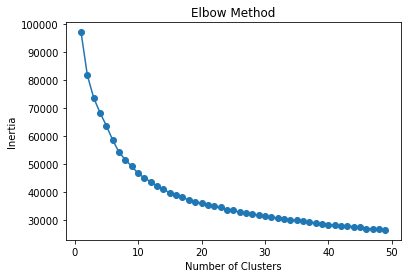

In [214]:
#import kmeans stuff
from sklearn.cluster import KMeans
kmeans = KMeans()

##############################################################
#define scree plot/inertia plot
def plot_inertia(km, X, n_cluster_range):
    inertias = []
    for i in n_cluster_range:
        km.set_params(n_clusters=i)
        km.fit(X)
        inertias.append(km.inertia_)
    plt.plot(n_cluster_range, inertias, marker='o')
    plt.title('Elbow Method')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Inertia')
    plt.show()

#impute NaNswith 0
cc.fillna(0, inplace=True)

plot_inertia(KMeans(), cc, range(1, 50))


## Kind of hard to tell, but lets guess 3 or 5 or 8?

### keep in mind that this data is possibly not great to make meaningful groups, also sometimes it's easier to segment into fewer groups for descriptive purposes

The average silhouette coefficient for 3 clusters is 0.21079391451831467


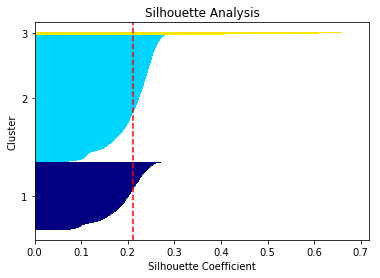

The average silhouette coefficient for 4 clusters is 0.13630661873821473


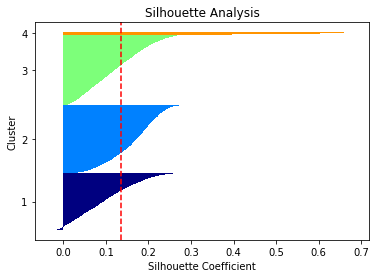

The average silhouette coefficient for 5 clusters is 0.15567602860599808


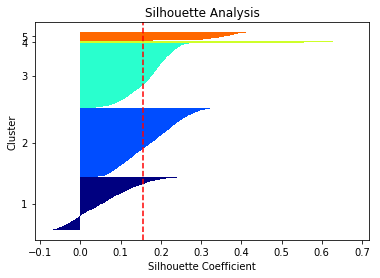

The average silhouette coefficient for 6 clusters is 0.17698123991677456


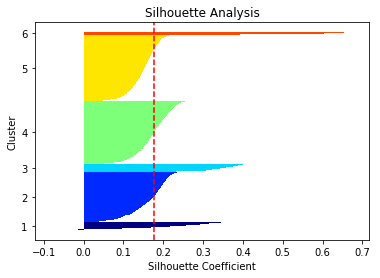

The average silhouette coefficient for 7 clusters is 0.16111786303125714


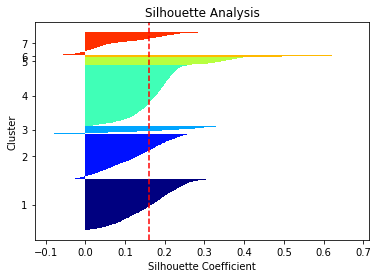

The average silhouette coefficient for 8 clusters is 0.16635153567967012


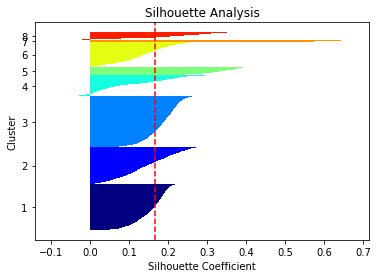

The average silhouette coefficient for 9 clusters is 0.17179855521950285


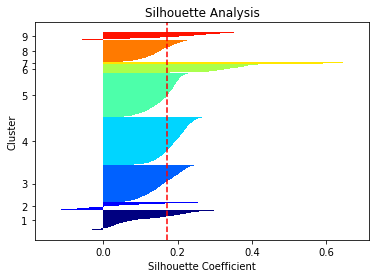

The average silhouette coefficient for 10 clusters is 0.155699014055408


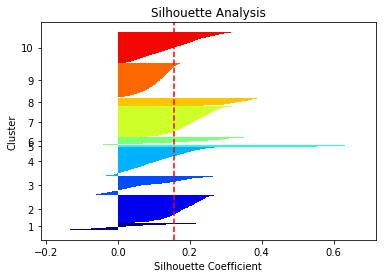

The average silhouette coefficient for 11 clusters is 0.1652138253248319


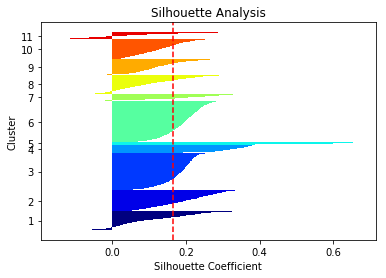

The average silhouette coefficient for 12 clusters is 0.15315773862044946


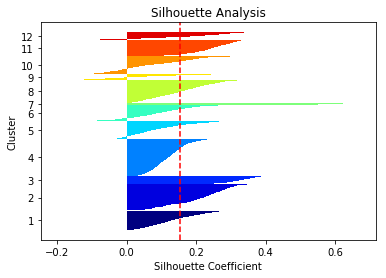

In [218]:
def plot_silhouette(kmeans, x):
    y_km = kmeans.fit_predict(x)
    cluster_labels = np.unique(y_km)
    n_clusters = cluster_labels.shape[0]
    
    from sklearn.metrics import silhouette_samples
    import matplotlib.pyplot as plt
    from matplotlib import cm
    
    silhouette_vals = silhouette_samples(x, y_km, metric='euclidean')
    y_ax_lower, y_ax_upper = 0, 0
    yticks = []
    for i, c in enumerate(cluster_labels):
        # Aggregate the silhouette scores for samples belonging to
        # cluster c, and sort them
        c_silhouette_vals = silhouette_vals[y_km == c]
        c_silhouette_vals.sort()

        size_cluster_c = len(c_silhouette_vals)
        y_ax_upper += size_cluster_c
        color = cm.jet(i*1.0/n_clusters)
        plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0, color=color)

        # Compute the new y_ax_lower for next plot
        yticks.append((y_ax_lower + y_ax_upper) / 2)
        y_ax_lower += size_cluster_c

    # The vertical line for average silhouette score of all the values
    silhouette_avg = np.mean(silhouette_vals)
    print("The average silhouette coefficient for {} clusters is {}".format(n_clusters, silhouette_avg))
    plt.axvline(silhouette_avg, color='red', linestyle='--')

    plt.yticks(yticks, cluster_labels + 1)
    plt.title('Silhouette Analysis')
    plt.ylabel('Cluster')
    plt.xlabel('Silhouette Coefficient')
    plt.show()

for i in range(3,13):
    plot_silhouette(KMeans(n_clusters = i), cc)


# Run analysis with 3 clusters

In [221]:
cluster_model = KMeans(n_clusters = 3)
cluster_model.fit(cc)

casper_subset['Cluster_Labels'] = cluster_model.labels_
cc['Cluster_Labels'] = cluster_model.labels_

cc.head()
casper_subset.head()

,date,age,hours,french,rating,review_length,page,gender_encode,multiple_partners,single_partner,solo,pets,state_encoded,Cluster_Labels
0,2018-02-13,35.0,8,False,5,123,1,5,False,True,False,False,21,2
1,2018-02-13,33.0,8,False,5,299,1,3,False,False,True,False,31,1
2,2018-02-13,70.0,7,False,4,25,1,5,False,False,True,False,54,1
3,2018-02-13,66.0,8,False,3,162,1,0,False,True,False,False,28,2
4,2018-02-12,37.0,8,False,5,84,1,3,False,True,False,True,69,0


# Examine the different clusters

2    2902
1    2670
0    2205
Name: Cluster_Labels, dtype: int64

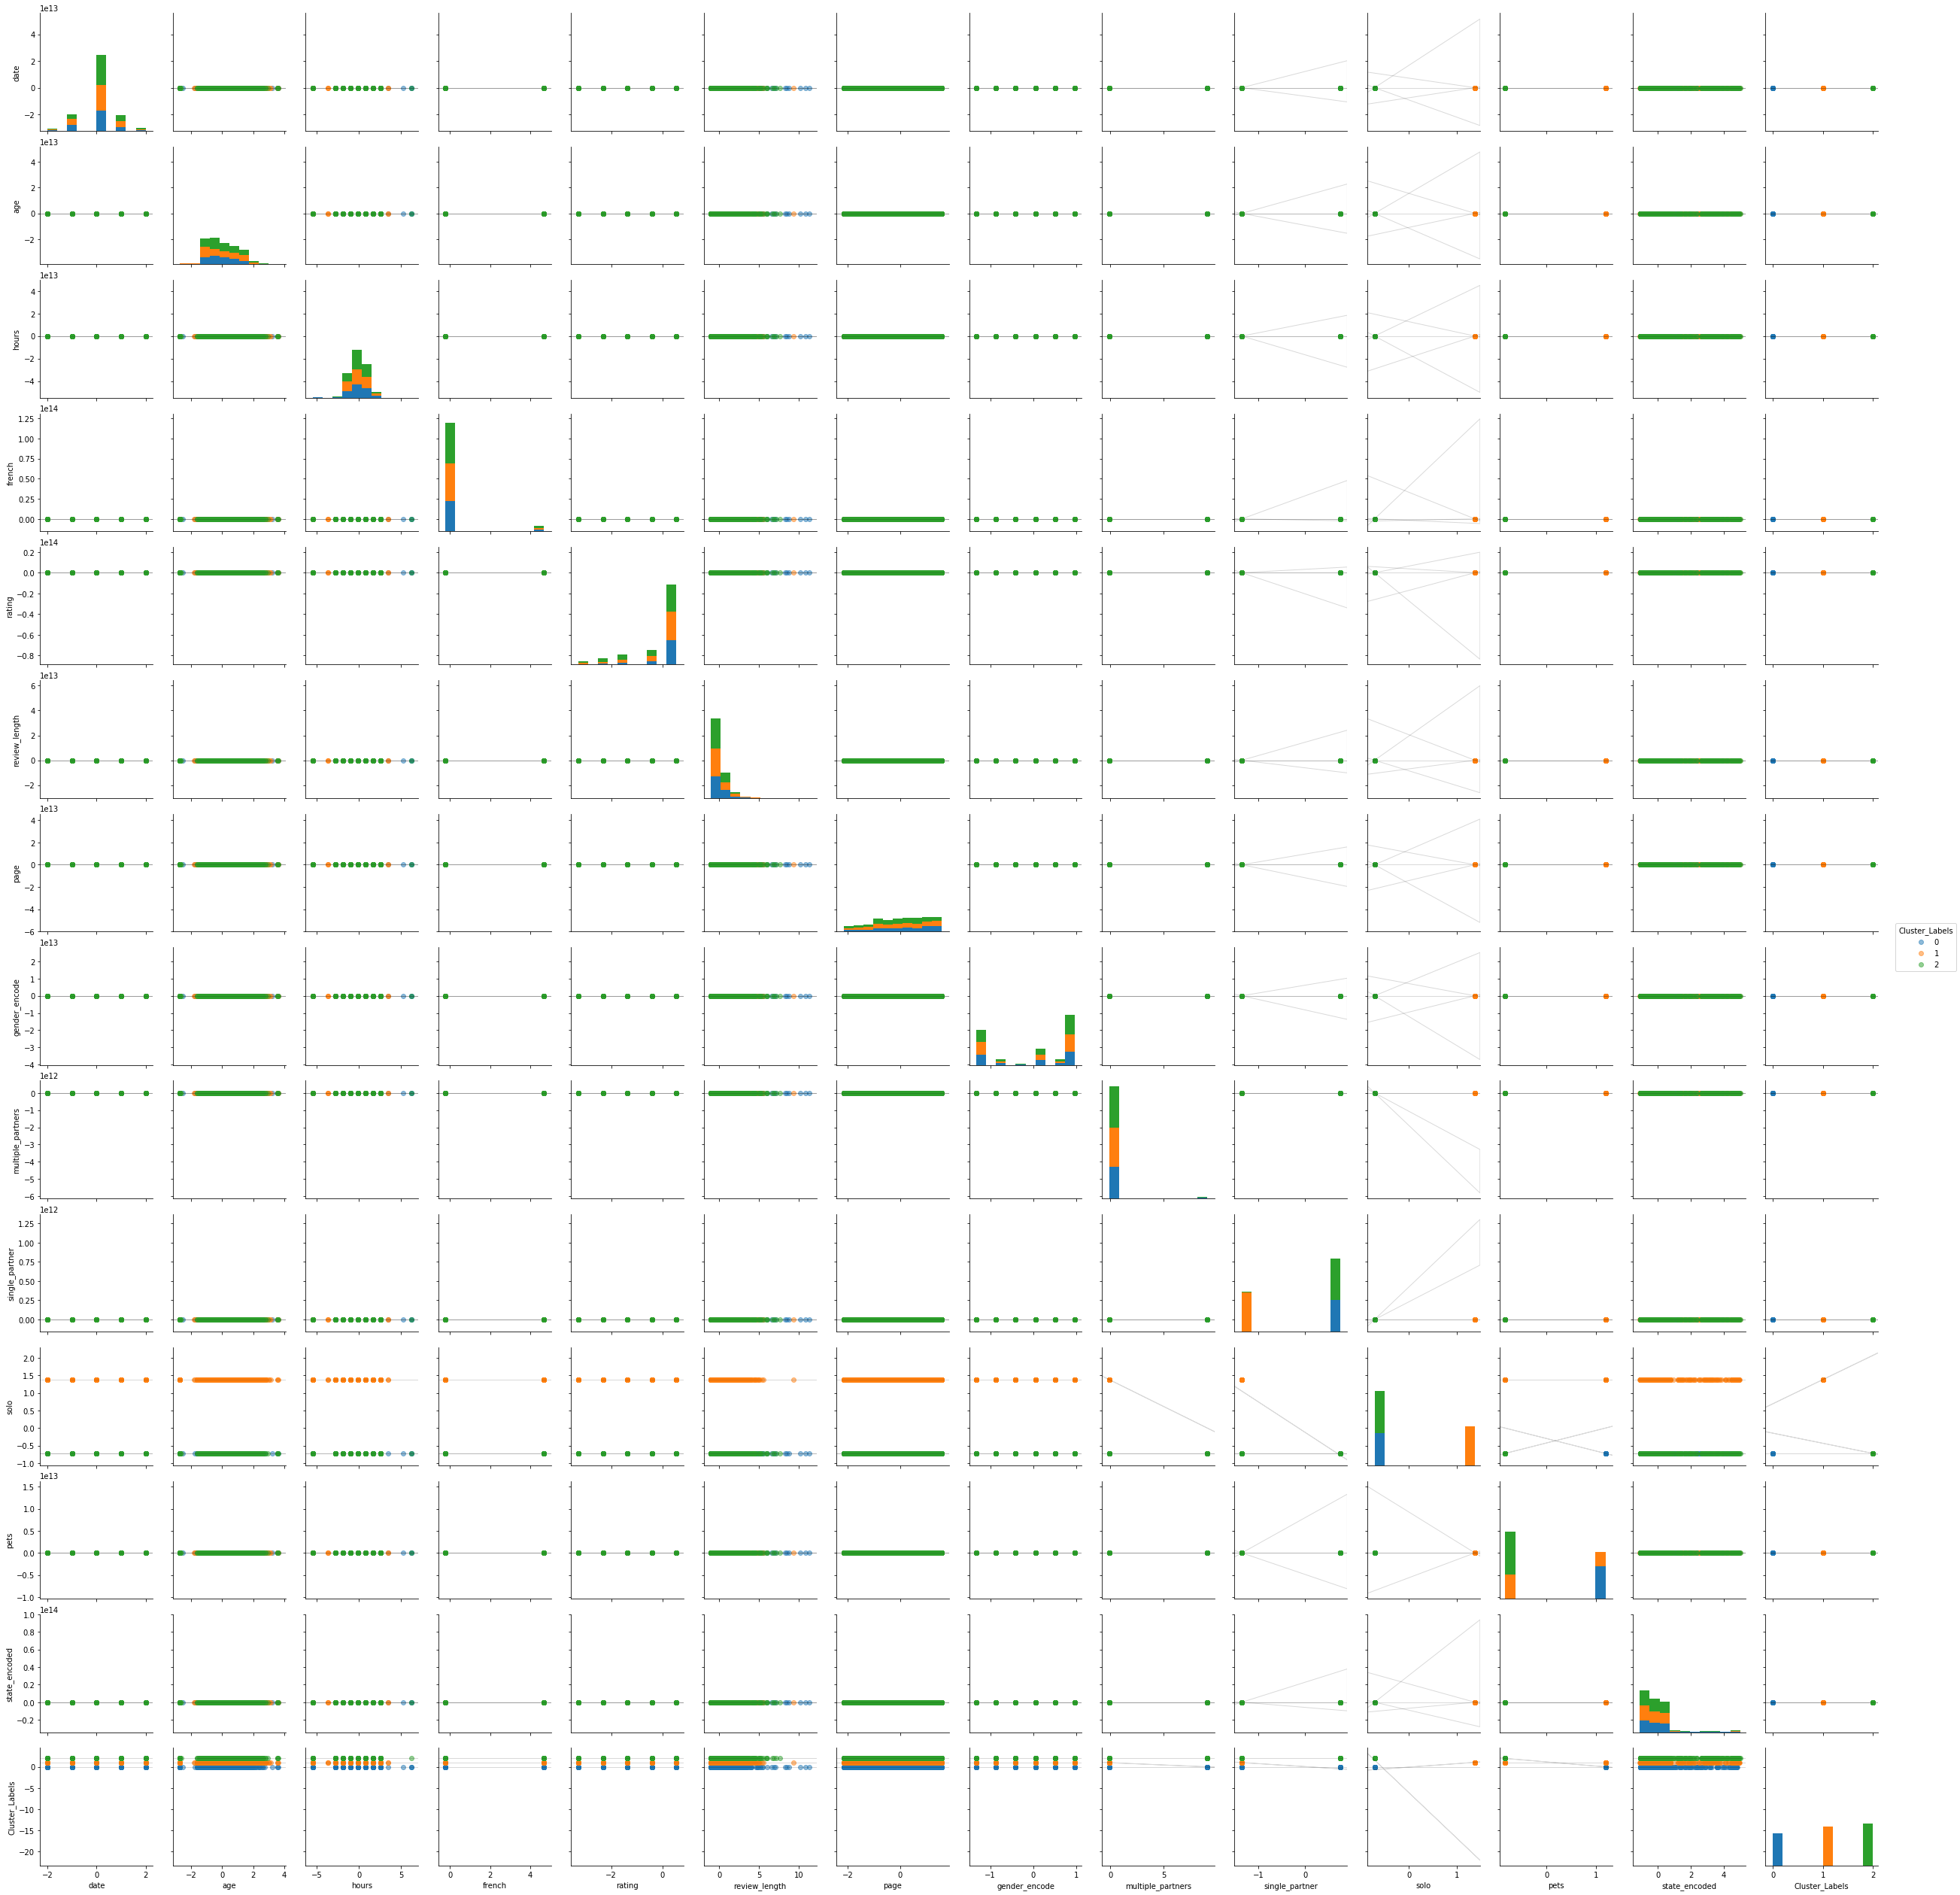

In [247]:
#visulize with pairplot
sns.pairplot(cc,
             kind = 'reg',
             hue = 'Cluster_Labels',
             plot_kws = {'line_kws':{'color':'None'}, 'scatter_kws': {'alpha': 0.5}})

casper_subset['Cluster_Labels'].value_counts()

#

In [236]:
#visualize with pca

from sklearn.decomposition import PCA

pca = PCA()
cc2 = pca.set_params(n_components=2).fit_transform(cc.drop(axis=1, columns='Cluster_Labels'))

cc2

array([[-0.82653052, -2.17169582],
       [ 2.00331925, -1.46512004],
       [ 2.21681594, -3.11251149],
       ..., 
       [-1.26020339,  2.04501115],
       [-0.76979203,  1.60390204],
       [-1.24492   ,  2.31781222]])

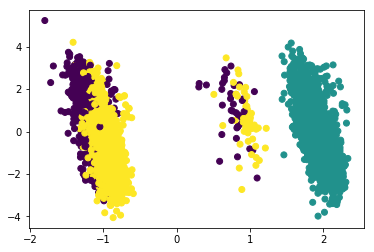

In [241]:
plt.scatter(cc2[:,0], cc2[:,1], c=cc.Cluster_Labels)
plt.show()

## It looks like it may have captured the wrong groups
### maybe there was some multicollinearity that the PCA captured

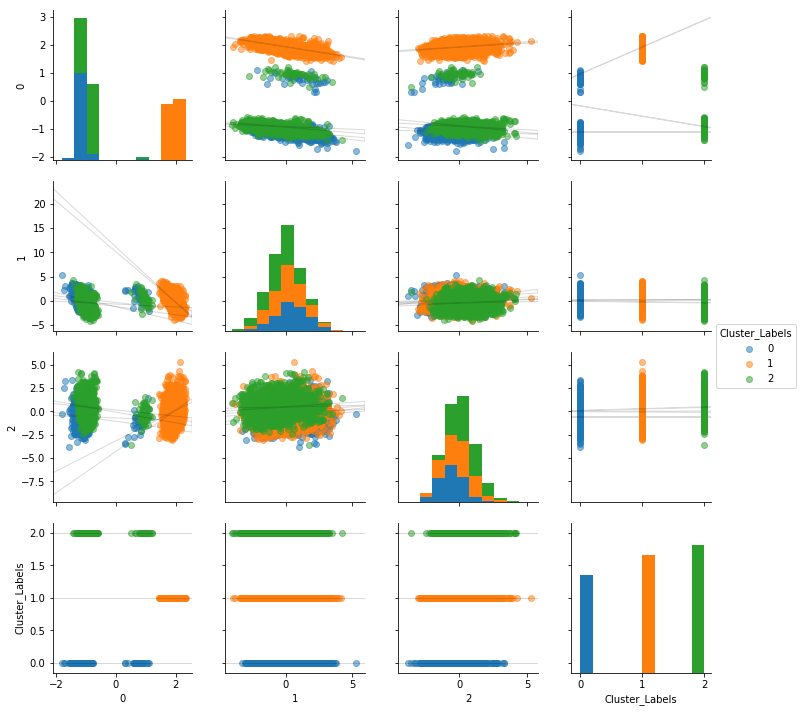

In [246]:
pca = PCA()
cc3 = pca.set_params(n_components=3).fit_transform(cc.drop(axis=1, columns='Cluster_Labels'))
cc3 = pd.DataFrame(cc3)
cc3['Cluster_Labels'] = cc.Cluster_Labels
sns.pairplot(cc3,
             kind = 'reg',
             hue = 'Cluster_Labels',
             plot_kws = {'line_kws':{'color':'None'}, 'scatter_kws': {'alpha': 0.5}})


# Going to try running PCA, then cluster on the principal components

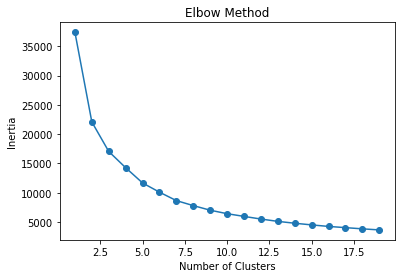

In [275]:
#3 pcs and then fit kmeans
pca = PCA()
cc3 = pca.set_params(n_components=3).fit_transform(cc.drop(axis=1, columns='Cluster_Labels'))
cc3 = pd.DataFrame(cc3)

#screeplot
plot_inertia(KMeans(), cc3, range(1, 20))

#### plenty of options, so lets look at pairplots and 3d plot to see if we can get a better idea

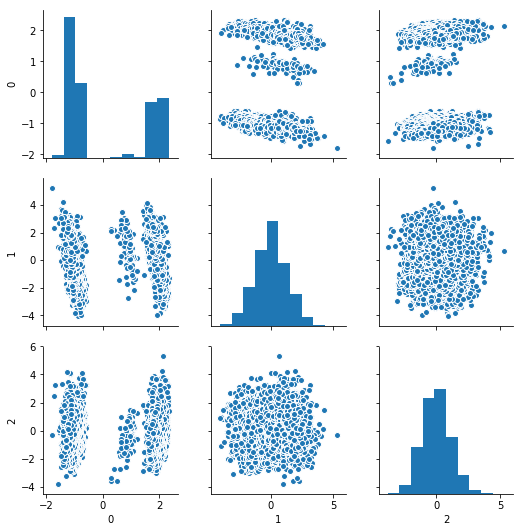

In [251]:
sns.pairplot(cc3)  ##three groups

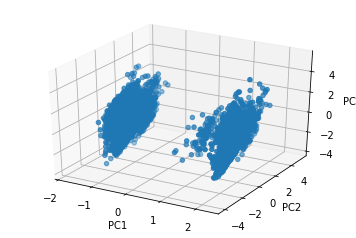

In [260]:
import numpy as np
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

threedee = plt.figure().gca(projection='3d')
threedee.scatter(cc3.iloc[:,0], cc3.iloc[:,1], cc3.iloc[:,2])
threedee.set_xlabel('PC1')
threedee.set_ylabel('PC2')
threedee.set_zlabel('PC3')
plt.show()

#### Going with 3 clusters

In [283]:
pca = PCA()
cc3 = pca.set_params(n_components=2).fit_transform(cc.drop(axis=1, columns='Cluster_Labels'))
cc3 = pd.DataFrame(cc3)

cc3.columns = ['pc1','pc2']

cluster_pca_model = KMeans(n_clusters = 3, init='random', max_iter=1)
cluster_pca_model.fit(cc3)

KMeans(algorithm='auto', copy_x=True, init='random', max_iter=1, n_clusters=3,
    n_init=10, n_jobs=1, precompute_distances='auto', random_state=None,
    tol=0.0001, verbose=0)

In [284]:
cc3['labels'] = cluster_pca_model.labels_
cc3.head(3)

,pc1,pc2,labels
0,-0.826531,-2.171696,2
1,2.003319,-1.465120,1
2,2.216816,-3.112511,1


# Visualize clusters with components

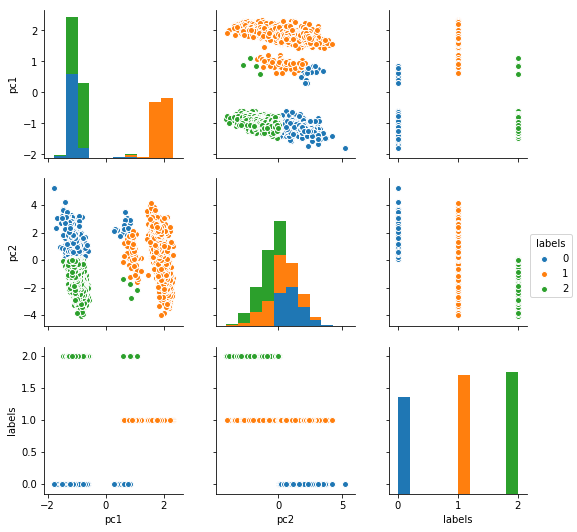

In [285]:
sns.pairplot(cc3, hue='labels')

### Not the groups I expected! I wonder why

+ The groups are not circular, but more wedge-like
+ Try another type of clustering
    + Spectral
    + Guassian Mixture
+ Both work well on this type of data, will have to try next time
+ But I wonder if scaling down PC2 to make the clusters more circular will help for now

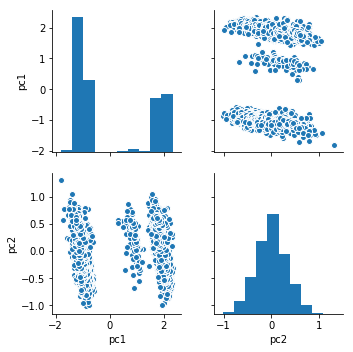

In [289]:
#pca = PCA()
cc3 = pca.set_params(n_components=2).fit_transform(cc.drop(axis=1, columns='Cluster_Labels'))
cc3 = pd.DataFrame(cc3)

cc3.columns = ['pc1','pc2']

cc3.pc2 = cc3.pc2/4
sns.pairplot(cc3)

In [290]:
cluster_pca_model = KMeans(n_clusters = 3, init='random', max_iter=1)
cluster_pca_model.fit(cc3)

KMeans(algorithm='auto', copy_x=True, init='random', max_iter=1, n_clusters=3,
    n_init=10, n_jobs=1, precompute_distances='auto', random_state=None,
    tol=0.0001, verbose=0)

        pc1       pc2  labels
0 -0.826531 -0.542924       1
1  2.003319 -0.366280       0
2  2.216816 -0.778128       0


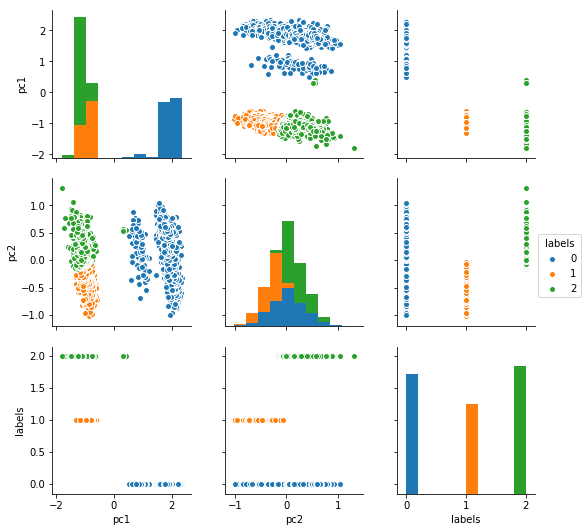

In [294]:
cc3['labels'] = cluster_pca_model.labels_
print(cc3.head(3))

#visualize results
sns.pairplot(cc3, hue='labels')

In [299]:
cc3['labels'].value_counts()
#equal groups

2    2950
0    2760
1    2067
Name: labels, dtype: int64

# Add cluster to original dataset & save file!

In [300]:
casper['cluster_labels'] = cc3['labels']

In [301]:
casper.to_csv('final_clusters.csv')

In [263]:
casper.head()

,date,name,age,city,state,rating,title,review,hours,partners,...,french,first_name,gender,city_state,location,latitude,longitude,all_words,review_length,gender_encode
0,2018-02-13,Joe W,35.0,Chicago,Illinois,5,Great Mattress,We visited the Chicago store in Fulton Market....,8,Sleeps with a partner,...,False,Joe,male,"Chicago, Illinois","Chicago, Cook County, Illinois, United States ...",41.8756,-87.6244,"[We, visited, the, Chicago, store, in, Fulton,...",123,5
1,2018-02-13,J,33.0,Boston,Massachusetts,5,Highly Recommend,Ive had my previous mattress for YEARS (WAY ov...,8,Sleeps solo,...,False,J,unknown,"Boston, Massachusetts","Boston, Suffolk, Massachusetts, United States ...",42.3605,-71.0596,"[Ive, had, my, previous, mattress, for, YEARS,...",299,3
2,2018-02-13,David Alessi,70.0,Owasso,Oklahoma,4,I like it but am still getting used to it.,The unboxing was a challenge but we managed. I...,7,Sleeps solo,...,False,David,male,"Owasso, Oklahoma","Owasso, Tulsa County, Oklahoma, 74055, United ...",36.2662,-95.8549,"[The, unboxing, was, a, challenge, but, we, ma...",25,5
3,2018-02-13,Jeanne Hamlin,66.0,Brownville,Maine,3,okay,The un-boxing was interesting. I was disappoi...,8,Sleeps with a partner,...,False,Jeanne,female,"Brownville, Maine","Brownville, Piscataquis County, Maine, 04414, ...",45.3073,-69.034,"[The, un-boxing, was, interesting., I, was, di...",162,0
4,2018-02-12,LETTY DELOACH,37.0,Live Oak,Texas,5,Finally found THE mattress!,I absolutely love my Casper mattress! I was v...,8,Sleeps with a partner plus a cat,...,False,LETTY,unknown,"Live Oak, Texas","Live Oak County, Texas, United States of America",28.2679,-98.1019,"[I, absolutely, love, my, Casper, mattress!, I...",84,3


# Compare groups

In [303]:
casper.groupby('cluster_labels').mean()

,age,rating,hours,page,multiple_partners,single_partner,solo,pets,french,review_length,gender_encode
cluster_labels,,,,,,,,,,,
0,43.407678,4.480797,7.011957,579.621377,0.032609,0.000000,0.967391,0.375000,0.043116,73.827536,2.885507
1,47.306686,4.029511,7.104015,354.173682,0.000000,1.000000,0.000000,0.249637,0.000968,60.546202,2.970005
2,40.643947,4.646441,7.142373,758.099661,0.001017,0.998983,0.000000,0.560339,0.074576,87.330847,2.847119


# Results 

+ **Finding**: It seems cluster 1 is the oldest, rates the hardest, writes the least, and has more men than women
+ **Action**: Research can be done to see why older male groups find the mattress less worthy
+ **Finding**: The youngest group is most likely to speak french, write the most, sleep with pets, and rate the mattress the highest
+ **Action**: Current marketing strategy for this cohort works well, but can maybe target this group of pet-lovers for doggy beds to get repeat customers or glorify co-sleeping with pets in ads to generate customers that fit this criteria

# Woulda, Shoulda, Coulda
### aka Future Work

+ Use more/better demographic data, sales data (sale amount, repeat customer), web browsing data (time on site, ctr) to get more accurate results
+ Find (or build) a better geoencoder because it caused about 75% missingness and was therefore not useful!
+ Switch to Guassian mixture or spectral to better fit the wedge-shaped clusters
+ Include more NLP for either (or both) pre-processing or analysis after identifying groups